# Pymaceuticals Inc.
---
### Analysis

-The higher number of rows for Capomulin and Ramicane on the bar graph indicates that more mice were treated with these regimens or had more recorded timepoints during the study. The pie chart mice by gender showed that the population is almost 50% female and 50% male.

-The line plot shows an overall decrease in the average tumor volume as the days increase with Capomulin treatment of mouse l509. However, there is a slight increase in some days.

-The correlation coefficient is 0.84, which means a strong correlation. This means there is a reliable and consistent pattern in how these two variables relate. This correlation is intuitive since the tumor has more space to develop if the mouse is bigger. However, we should note that correlation does not imply causation; hence, we should further explore the underlying mechanisms of the relationship between mouse weight and tumor volume to draw more conclusions.

-The R-squared is relatively high, indicating that the model explains a large portion of the variability in tumor volume based on mouse weight.

Appropriate statistical tests could be conducted to compare the efficacy of Capomulin against other treatments to improve the analysis.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(study_results, mouse_metadata, how="left", on = "Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice.
number_mice = merged_df["Mouse ID"].nunique()
number_mice

249

In [11]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated_mice_ID = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicated_mice_ID


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.

# Identify duplicate rows based on 'Mouse ID' and 'Timepoint'
#duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Display the duplicates
#duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

merged_clean_data = merged_clean_data[merged_clean_data['Mouse ID'].isin(dup_mice_ID)==False]
merged_clean_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [15]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean = merged_clean_data["Mouse ID"].nunique()
number_mice_clean

248

## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


mean = merged_clean_data['Tumor Volume (mm3)'].groupby(merged_clean_data['Drug Regimen']).mean()
median = merged_clean_data['Tumor Volume (mm3)'].groupby(merged_clean_data['Drug Regimen']).median()
var = merged_clean_data['Tumor Volume (mm3)'].groupby(merged_clean_data['Drug Regimen']).var()
std = merged_clean_data['Tumor Volume (mm3)'].groupby(merged_clean_data['Drug Regimen']).std()
sem = merged_clean_data['Tumor Volume (mm3)'].groupby(merged_clean_data['Drug Regimen']).sem()

summary_stats = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
                           
# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stats



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
#Using the .agg 


summary_aggreg = merged_clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggreg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

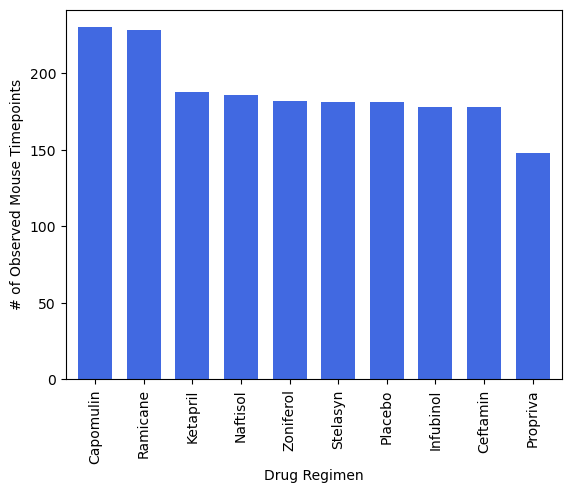

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


# Filter the DataFrame to keep only to those columns that we are interested in the chart
time_and_drugs = merged_clean_data[['Drug Regimen','Timepoint']]


#count per regimen
mice_per_drug = time_and_drugs['Drug Regimen'].value_counts()
mice_per_drug



#Use DataFrame.plot() in order to create a bar chart of the data
mice_per_drug.plot(kind= 'bar', color = 'royalblue',width=0.7,
                  xlabel= 'Drug Regimen',
                  ylabel= '# of Observed Mouse Timepoints')

plt.show()

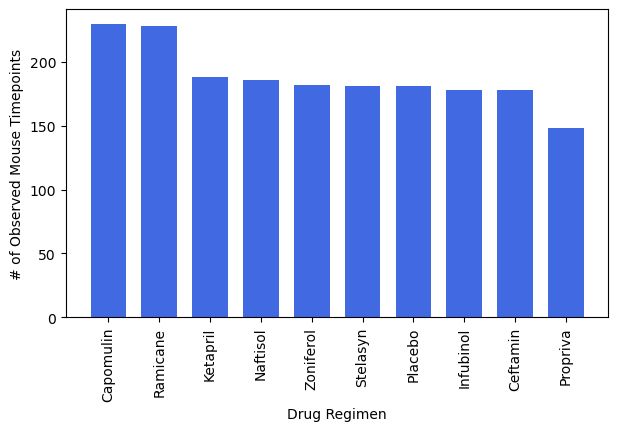

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Count the total number of rows for each drug regimen
regimen_counts = merged_clean_data['Drug Regimen'].value_counts()

# Generate the bar plot using pyplot
plt.figure(figsize=(7, 4))
plt.bar(regimen_counts.index, regimen_counts.values, color='royalblue', width=0.7)

# Customize the plot
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)  # Rotate 90º x-axis labels for better readability
plt.show()


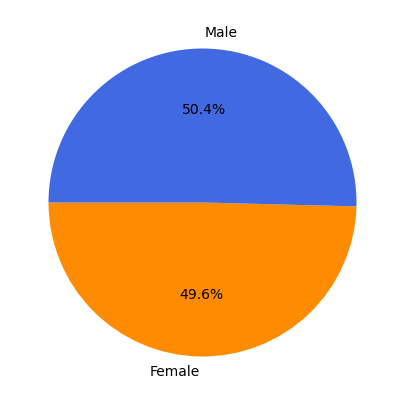

In [47]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get unique mice with their gender
unique_gender_mice = merged_clean_data[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of unique male and female mice
gender_counts = unique_gender_mice['Sex'].value_counts()
gender_counts = gender_counts.reindex(['Female', 'Male'])

# Make the pie chart

gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=180, colors=['darkorange', 'royalblue'], figsize=(5, 5))

# Customize the pie chart
plt.ylabel("")  # Remove the default y-axis label for cleaner look
plt.show()

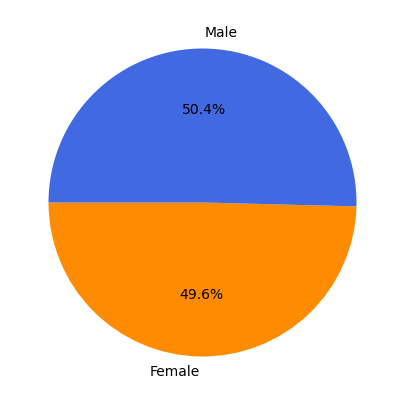

In [51]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get unique mice with their gender
unique_mice_pyplot = merged_clean_data[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of unique male and female mice
gender_counts = unique_mice_pyplot['Sex'].value_counts()
gender_counts = gender_counts.reindex(['Female', 'Male'])

# Make the pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180, colors=['darkorange', 'royalblue'])

plt.show()


## Quartiles, Outliers and Boxplots

In [53]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
reduced_drug_data = merged_clean_data.loc[(merged_clean_data['Drug Regimen'] == 'Capomulin') | (merged_clean_data['Drug Regimen'] == 'Ramicane') |
                                        (merged_clean_data['Drug Regimen'] == 'Infubinol') |(merged_clean_data['Drug Regimen'] == 'Ceftamin') ]

# Start by getting the last (greatest) timepoint for each mouse
last_tp = reduced_drug_data.groupby(['Drug Regimen','Mouse ID']).last()
new_last_tp = last_tp.reset_index()

# reduce_last_tp=reduced_drug_data[reduced_drug_data[['Drug Regimen', 'Tumor Volume (mm3)']]]
reduced_last_tp=new_last_tp[['Drug Regimen', 'Tumor Volume (mm3)']]
reduced_last_tp

capomulin_df = reduced_last_tp.loc[reduced_last_tp['Drug Regimen'] == 'Capomulin']
capomulin_df

ramicane_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == 'Ramicane']
ramicane_df

infubinol_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == 'Infubinol']
infubinol_df

ceftamin_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == 'Ceftamin']
ceftamin_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = pd.DataFrame({'Capomulin': capomulin_df['Tumor Volume (mm3)'],
         'Ramicane': ramicane_df['Tumor Volume (mm3)'],
          'Infubinol': infubinol_df['Tumor Volume (mm3)'],
          'Ceftamin': ceftamin_df['Tumor Volume (mm3)']})


,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,NaN,NaN,NaN
1,38.939633,NaN,NaN,NaN
2,30.485985,NaN,NaN,NaN
3,37.074024,NaN,NaN,NaN
4,40.159220,NaN,NaN,NaN
...,...,...,...,...
95,NaN,30.276232,NaN,NaN
96,NaN,40.667713,NaN,NaN
97,NaN,43.166373,NaN,NaN
98,NaN,44.183451,NaN,NaN


In [56]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = []
for drug in reduced_last_tp["Drug Regimen"]:
    if drug not in treatment:
        treatment.append(drug)
treatment



# Create empty list to fill with tumor vol data (for plotting)
tum_vol = []
upperq_list = []
lowerq_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.

for drug in treatment:    
    quartiles = last_timepoint_df[drug].quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    drug_iqr = upperq-lowerq
    
    #list containing upper and lower quartiles of drug final tumor volume 
    upperq_list.append(upperq)
    lowerq_list.append(lowerq)
    print(f"iqr for {drug}: {drug_iqr}")
    
upperq_list   
lowerq_list

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds
 

iqr for Capomulin: 7.781863460000004
iqr for Ceftamin: 15.577752179999997
iqr for Infubinol: 11.477135160000003
iqr for Ramicane: 9.098536719999998


[32.37735684, 48.72207785, 54.04860769, 31.56046955]

Text(0.5, 0, '')

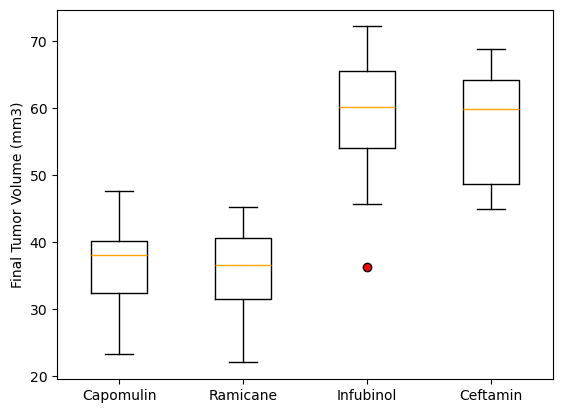

In [65]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

boxplot = last_timepoint_df.boxplot(grid = False, color = dict(boxes = 'k', whiskers='k', medians='orange'))
boxplot.set_ylabel('Final Tumor Volume (mm3)')

# Customize outlier colors by accessing the underlying Matplotlib artists
for line in boxplot.lines:

    if line.get_linestyle() == 'None' and line.get_marker() == 'o':
        line.set_markerfacecolor('red')  # Change the outlier color to red
        line.set_markeredgecolor('black')   # Change the edge color to red

boxplot.set_xlabel('')

## Line and Scatter Plots

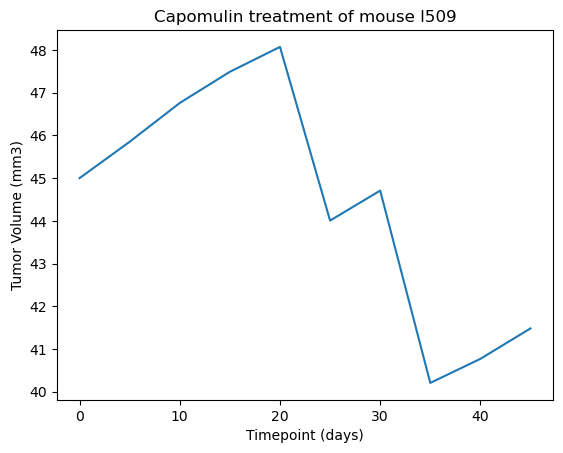

In [69]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_df = merged_clean_data.loc[(merged_clean_data["Drug Regimen"] == "Capomulin") & (merged_clean_data["Mouse ID"] == "l509") ]
reduced_capomulin_df = capomulin_df[["Timepoint","Tumor Volume (mm3)" ]]
reduced_capomulin_df = reduced_capomulin_df.set_index(["Timepoint"])

#values for plotting
timepoint = reduced_capomulin_df.index.values
tumor_vol = reduced_capomulin_df.values

#graph build and display
plt.plot(timepoint, tumor_vol)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

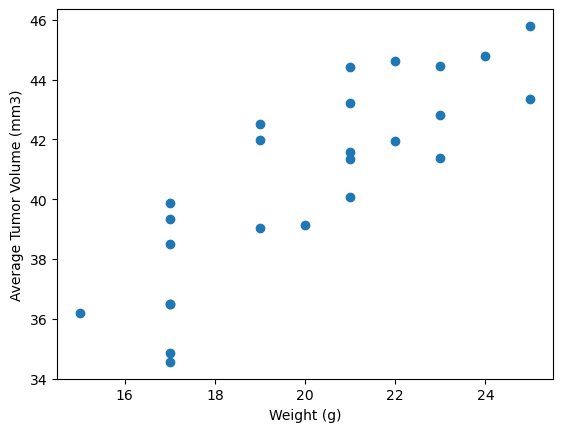

In [78]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
new_capomulin_df = merged_clean_data.loc[(merged_clean_data["Drug Regimen"] == "Capomulin")]
group_capomulin_df = new_capomulin_df.groupby("Mouse ID")

#Storing average tumor volume for each weight
avg_tumor_vol = group_capomulin_df[("Tumor Volume (mm3)")].mean()
weight = group_capomulin_df["Weight (g)"].mean()
avg_capomulin_df = pd.DataFrame({"Weight (g)": weight,
                            "Tumor Volume (mm3)": avg_tumor_vol})
#creating gragh
plt.scatter(weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The r-squared is: 0.709


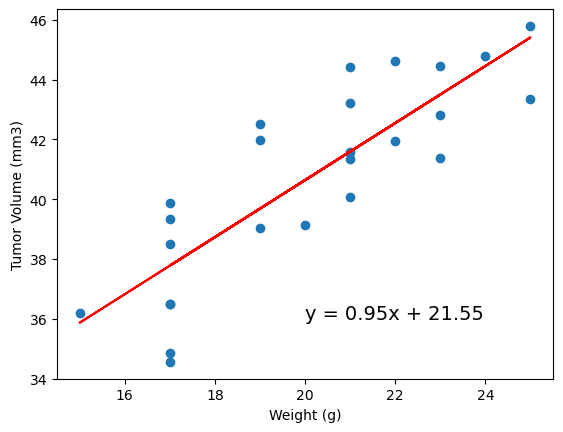

In [82]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr (weight,avg_tumor_vol )

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values=avg_capomulin_df["Weight (g)"]
y_values=avg_capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_vol)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()
